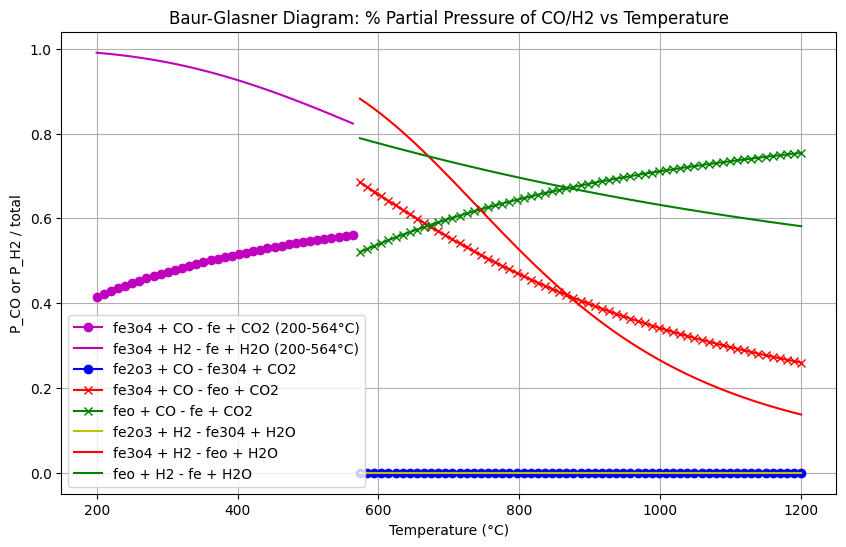

In [5]:
import numpy as np
import matplotlib.pyplot as plt

R = 8.314  
temp_C = np.linspace(200, 1200, 100)  
temp_K = temp_C + 273.15 
G_CO_formation = -114400-85.8*temp_K
G_CO2_formation = -395300-0.5*temp_K
G_H2O_formation = -247300+55.9*temp_K
G_HM_formation = -814100+250.7*temp_K
G_MG_formation = -1102200+307.4*temp_K
G_Wu_formation = -263700+64.3*temp_K

G0 = -(3*G_HM_formation + G_CO_formation - 2*G_MG_formation - G_CO2_formation) # 3fe2o3 + co - 2fe304 + CO2
G1 = -(G_MG_formation + G_CO_formation - 3*G_Wu_formation - G_CO2_formation) # fe3o4 + co -> 3 feo + co2
G2 = -(G_Wu_formation + G_CO_formation - G_CO2_formation) # feo + co = fe + co2
G3 = -(G_MG_formation + 4*G_CO_formation - 4*G_CO2_formation) # fe3o4 + 4co - 3fe + 4co2
G0_ = -(3*G_HM_formation - 2*G_MG_formation - G_H2O_formation) # 3fe2o3 + H2 - 2fe304 + H2O
G1_ = -(G_MG_formation - 3*G_Wu_formation - G_H2O_formation) # fe3o4 + h2 - 3 feo + h2o
G2_ = -(G_Wu_formation - G_H2O_formation) # feo + H2 = fe + H2O
G3_ = -(G_MG_formation - 4*G_H2O_formation) # fe3o4 + 4H2 - 3fe + 4H2O


split_temp_C = 564
split_temp_K = split_temp_C + 273.15

P_CObitotal = np.zeros_like(temp_K)
P_CO_1bitotal = np.zeros_like(temp_K)
P_CO_2bitotal = np.zeros_like(temp_K)
P_CO_3bitotal = np.zeros_like(temp_K)
P_h2bitotal = np.zeros_like(temp_K)
P_h2_1bitotal = np.zeros_like(temp_K)
P_h2_2bitotal = np.zeros_like(temp_K)
P_h2_3bitotal = np.zeros_like(temp_K)

for i in range(len(temp_K)):
    if temp_K[i] <= split_temp_K:
        P_CO_3bitotal[i] = 1 / (1 + np.exp(-G3[i] / (4 * R * temp_K[i])))
        P_h2_3bitotal[i] = 1 / (1 + np.exp(-G3_[i] / (4 * R * temp_K[i])))

for i in range(len(temp_K)):
    if temp_K[i] > split_temp_K:
        P_CObitotal[i] = 1 / (1 + np.exp(-G0[i] / (R * temp_K[i])))
        P_CO_1bitotal[i] = 1 / (1 + np.exp(-G1[i] / (R * temp_K[i])))
        P_CO_2bitotal[i] = 1 / (1 + np.exp(-G2[i] / (R * temp_K[i])))

        P_h2bitotal[i] = 1 / (1 + np.exp(-G0_[i] / (R * temp_K[i])))
        P_h2_1bitotal[i] = 1 / (1 + np.exp(-G1_[i] / (R * temp_K[i])))
        P_h2_2bitotal[i] = 1 / (1 + np.exp(-G2_[i] / (R * temp_K[i])))

plt.figure(figsize=(10, 6))

plt.plot(temp_C[temp_K <= split_temp_K], P_CO_3bitotal[temp_K <= split_temp_K], marker='o', linestyle='-', color='m', label='fe3o4 + CO - fe + CO2 (200-564°C)')
plt.plot(temp_C[temp_K <= split_temp_K], P_h2_3bitotal[temp_K <= split_temp_K], color='m', label='fe3o4 + H2 - fe + H2O (200-564°C)')

plt.plot(temp_C[temp_K > split_temp_K], P_CObitotal[temp_K > split_temp_K], marker='o', linestyle='-', color='b', label='fe2o3 + CO - fe304 + CO2')
plt.plot(temp_C[temp_K > split_temp_K], P_CO_1bitotal[temp_K > split_temp_K], marker='x', linestyle='-', color='r', label='fe3o4 + CO - feo + CO2')
plt.plot(temp_C[temp_K > split_temp_K], P_CO_2bitotal[temp_K > split_temp_K], marker='x', linestyle='-', color='g', label='feo + CO - fe + CO2')

plt.plot(temp_C[temp_K > split_temp_K], P_h2bitotal[temp_K > split_temp_K], color='y', label='fe2o3 + H2 - fe304 + H2O')
plt.plot(temp_C[temp_K > split_temp_K], P_h2_1bitotal[temp_K > split_temp_K], color='r', label='fe3o4 + H2 - feo + H2O')
plt.plot(temp_C[temp_K > split_temp_K], P_h2_2bitotal[temp_K > split_temp_K], color='g', label='feo + H2 - fe + H2O')

plt.xlabel('Temperature (°C)')
plt.ylabel('P_CO or P_H2 / total')
plt.title('Baur-Glasner Diagram: % Partial Pressure of CO/H2 vs Temperature')
plt.legend()
plt.grid(True)
plt.show()
